# MuMoT Demonstration Notebook: Epidemic Models <a class="tocSkip">

## Multiscale Modelling Tool  <a class="tocSkip">

This is a demo for [MuMoT](https://github.com/DiODeProject/MuMoT), a software tool developed at the University of Sheffield as part of the [DiODe](http://diode.group.shef.ac.uk) project

In [1]:
import mumot as mmt

mmt.__version__

Created `%%model` as an alias for `%%latex`.


'0.1.0-dev'

### Defining the SIRI model
In this demo we study epidemic models. To do this, we use a model called the SIRI (Susceptible-Infected-Recovered-Infected) model in which the rate of primary infections can be different from the rate of secondary infections. The SIRI model contains the SI, SIS, and SIR models as special cases and allows for the study of systems in which individuals become more or less susceptible to the infection after first exposure.

See the following publications for more details on the SIRI model:
 - [R. Pagliara, B. Dey and N. E. Leonard, "Bistability and Resurgent Epidemics in Reinfection Models," in IEEE Control Systems Letters, vol. 2, no. 2, pp. 290-295, April 2018.](http://ieeexplore.ieee.org/stamp/stamp.jsp?tp=&arnumber=8353159&isnumber=8226891)

Consider a population in which an individual can be in any of the following three states: _susceptible_ ($S$), _infected_ ($I$), or _recovered_ ($R$). Susceptible and recovered individuals become infected through contact with already infected individuals at respective rates $b \geq 0$ and $b_h \geq 0$, while infected individuals recover at a fixed rate $d \geq 0$:



In [2]:
%%model
$
S + I -> I + I : b
R + I -> I + I : b_h
I -> R : d
$

<IPython.core.display.Latex object>

In [3]:
model1 = mmt.parseModel(In[2])

The SIRI model has 3 parameters: an infection rate $b$, a reinfection rate $b_h$, and a recovery rate $d$.

In [4]:
model1.showRates()

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

We can write down the SIRI model as a chemical reaction network:

In [5]:
model1.show()

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

We can represent the model with a diagram that better showcases the difference between infection, reinfection, and recovery. Notice that infection and reinfection are processes that depend on interactions between individuals, while recovery is a process that is independent from interactions. In the diagram below, the infection and reinfection are shown as arrows with a filled circle at the tail, symbolizing the dependence of these processes on interactions. In contrast, the recovery process is shown as an arrow without a circle at the tail, symbolizing that recovery does not depend on interactions between groups.

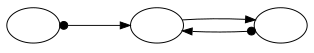

In [6]:
model1.visualise()

### Well-Mixed SIRI

Here we explore the SIRI model under the assumption of an infinite number of individuals in the population where any two individuals have the same probability of interaction (well-mixed conditions).

In [7]:
model1.showODEs()

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

The above system of three ordinary differential equations (ODE) describe how the populations of susceptible, infected, and recovered individuals change over time. MuMoT has derived these equations for you automatically, from the description of the reactions.

We can see that the infection process is represented via the term $ISb$ and the reinfection process is represented via the term $IRb_h$. These terms describe how the fraction of individuals change as infected individuals interact with either susceptible or recovered individuals at rates $b$ and $b_h$, respectively. Recovery is denoted via the term $Id$ which shows how individuals move from being infected to being recovered at rate $d$.

So, what analysis can we do in MuMoT now we've found our ODEs?

Well, we might want to look at how the state of the system (the fractions of individuals in each category) change over time. Before we can do that, we need to let MuMoT know that this is actually a simpler set of equations than it appears to be. $S$ (Susceptible), $I$ (Infected), and $R$ (Recovered) represent states that individuals can be in. In the ODEs above, $S$, $I$, and $R$ represent the fraction of individuals that belong to each state. Because the fractions must add to 1, we can reduce the system to two ODEs via the substitution $S+I+R=1$. In MuMoT, we do this by first defining the system size parameter $N = S+I+R$ and then setting $N=1$.

In [8]:
model2 = model1.substitute('R = N - S - I')
model2 = model2.substitute('N = 1')
model2.showODEs()

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Also, we can reduce the number of parameters from 3 to 2 by scaling time by $d$, resulting in the two parameters $r_0 = b/d$ and $r_1 = b_h/d$. The parameter $r_0$ is the basic reproductive number of the system when there are only susceptible and infected individuals (and no recovered individuals), while $r_1$ is the basic reproductive number of the system when there are only recovered and infected individuals (and no susceptible individuals). 

Mathematically, this is equivalent to setting $b=r_0 d$, $b_h = r_1 d$, and $d=1$.

In [9]:
model3 = model2.substitute('N=1,b=r_0*d,b_h=r_1*d')
model3 = model3.substitute('d=1')
model3.showODEs()

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Now we can look at the vector plot generated by the model for different parameter values $r_0$ and $r_1$.

### SIR Model

In the SIR model, recovered individuals cannot become infected again (i.e., $r_1=0$). This means that the fraction of susceptible individuals is always decreasing, and the infection always dies out in the long run. Mathematically, this means that all solutions of the system eventually reach an _infection free_ state where $I=0$. When the basic reproduction number $r_0<1$, all solutions decay monotonically to $I=0$, but when $r_0>1$, you should see that solutions that start with a small value of $I$ exhibit an _epidemic_ in which the fraction $I$ increases up to a maxmimum value before going to zero. The higher the value of $r_0$, the faster the epidemic grows and the higher the maximum value of $I$ is.

FloatSlider(value=1.5, continuous_update=False, description='\\(r_{0}\\)', max=10.0, min=0.1, readout_format='.1f', style=SliderStyle(description_width='initial'))

Accordion(children=(Box(children=(FloatSlider(value=10.0, continuous_update=False, description='Simulation time:', min=1.0, readout_format='.1f', style=SliderStyle(description_width='initial')),), layout=Layout(flex_flow='column')),), selected_index=None, _titles={'0': 'Advanced options'})

Button(icon='bookmark', style=ButtonStyle(), tooltip='Paste bookmark to log')

HTML(value='')

<IPython.core.display.Javascript object>


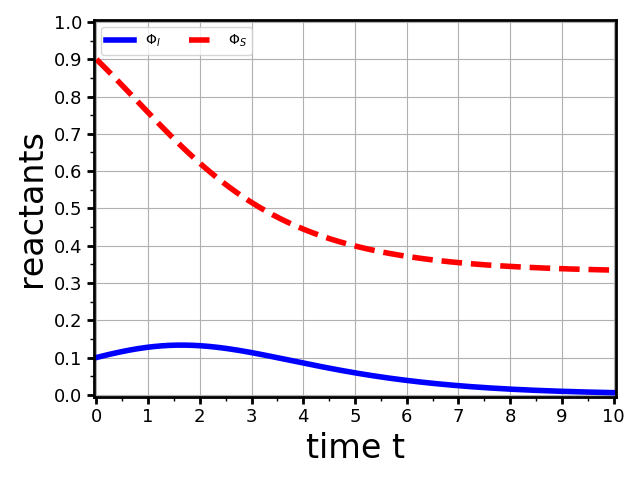

In [10]:
plot1 = model3.integrate(showStateVars=['S', 'I'],plotProportions=True, params=[('r_{1}',0),('systemSize',5)],initWidgets={'maxTime':[10,1,100,0.1],'r_{0}':[1.5,0.1,10,0.1]},initialState = {'R': 0.0, 'S': 0.9, 'I': 0.1}, choose_yrange=[0, 1])

Instead of looking at how one solution with a particular initial condition evolves in time, we can look at the vector field in state-space to see how all solutions evolve in time. The cell below generates a figure where $S$ is in the x-axis (represented as $Phi_S$) and $I$ is in the y-axis (represented as $Phi_I$). The arrows give the direction the system will move in, and their lengths show how fast. Because the fractions add to one, i.e., $S+I$ can never exceed 1, the top right hand triangle of the figure is greyed out; these are states that cannot be reached. Recall, that although we do not plot it, the fraction of recovered individuals, $R$ is given by $1-S-I$. 

Use the sliders to see how the flow changes for $r_0<1$ and $r_0>1$. Notice that all solutions eventually reach the x-axis (i.e., $I=0$), regardless of the value for $r_0$. However, notice how for $r_0>1$, solutions with a small initial value of $I$ show an epidemic where $I$ grows initially, reaches a maximum and then decays to $0$.

FloatSlider(value=1.5, description='\\(r_{0}\\)', max=10.0, min=0.1, readout_format='.1f', style=SliderStyle(description_width='initial'))

Button(icon='bookmark', style=ButtonStyle(), tooltip='Paste bookmark to log')

HTML(value='')

<IPython.core.display.Javascript object>


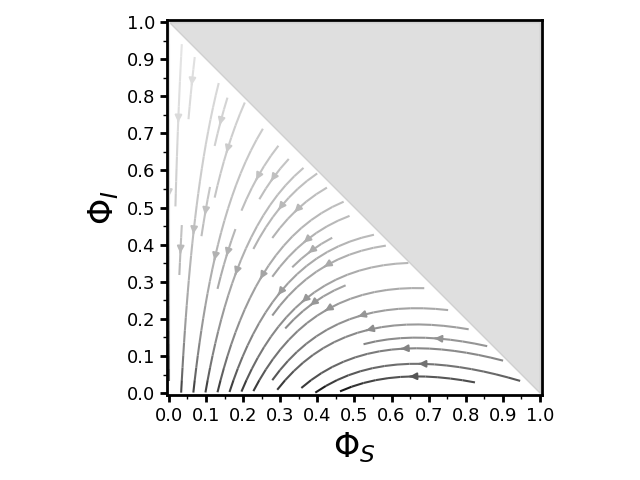

In [11]:
stream1 = model3.stream('S', 'I',showFixedPoints = False, params = [('r_{1}', 0)],initWidgets={'r_{0}':[1.5,0.1,10,0.1]})

### SIS Model

In the SIS model, there is no difference between susceptible and recovered individuals (i.e., $r_0=r_1$ ). This means we can combine the $S$ and $R$ states into a new state $S_{SIS}$, where $I+S_{SIS}=1$. This results in a further reduction in the number of ODEs in the model from two ODEs to one ODE. In the SIS model, whether the infection dies out ($I(\infty)=0$) or remains in the population ($I(\infty)>0$) depends on how easily it can spread through the population, that is, it depends on the basic reproduction number $r = r_0 = r_1$. When the basic reproduction number $r \leq 1$, all solutions decay monotonically to $I=0$, but when $r_0>1$, all solutions reach an _endemic_ equilibrium point where $I = (r-1)/r > 0$.

In [12]:
model4 = model3.substitute('r_0 =r, r_1=r')
sismodel = model4.substitute('S =P-I')
sismodel = sismodel.substitute('P =1')
sismodel.showODEs()

<IPython.core.display.Math object>

FloatSlider(value=1.5, continuous_update=False, description='\\(r\\)', max=2.0, min=0.1, readout_format='.1f', style=SliderStyle(description_width='initial'))

Accordion(children=(Box(children=(FloatSlider(value=10.0, continuous_update=False, description='Simulation time:', min=1.0, readout_format='.1f', style=SliderStyle(description_width='initial')),), layout=Layout(flex_flow='column')),), selected_index=None, _titles={'0': 'Advanced options'})

Button(icon='bookmark', style=ButtonStyle(), tooltip='Paste bookmark to log')

HTML(value='')

<IPython.core.display.Javascript object>


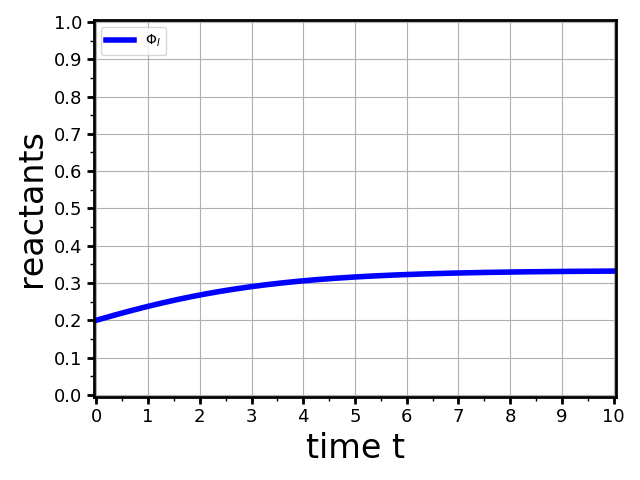

In [13]:
plot2 = sismodel.integrate(plotProportions=True, params=[('systemSize',5)],initWidgets={'maxTime':[10,1,100,0.1],'r':[1.5,0.1,2,0.1]},initialState = {'I': 0.2,'S':0.8,'R':0.0}, choose_yrange=[0, 1])

#### Transcritical Bifurcation in SIS model

The behavior of the SIS model in which dies out if $r \leq 1$ or reach an endemic point $I>0$ if $r>1$, are the result of what is known as a _transcritical bifurcation_ in which the infection-free equilibrium point $I=0$ is stable for any parameter value $r<1$ and is unstable for any parameter value $r>1$. At $r=1$, the equilibrium point $I=0$ loses stability and, at the same time, the endemic equiibrium point $I = (r-1)/r$ crosses the $I$-axis and gains stability. 

Button(icon='bookmark', style=ButtonStyle(), tooltip='Paste bookmark to log')

HTML(value='')

Accordion(children=(Box(children=(FloatSlider(value=1.0, continuous_update=False, description='$\\Phi_{I}$ at t=0: ', disabled=True, max=1.0, step=0.01, style=SliderStyle(description_width='initial')), FloatSlider(value=0.0, continuous_update=False, description='$\\Phi_{R}$ at t=0: ', max=1.0, step=0.01, style=SliderStyle(description_width='initial')), FloatSlider(value=0.0, continuous_update=False, description='$\\Phi_{S}$ at t=0: ', max=1.0, step=0.01, style=SliderStyle(description_width='initial'))), layout=Layout(flex_flow='column')),), selected_index=None, _titles={'0': 'Advanced options'})

<IPython.core.display.Javascript object>


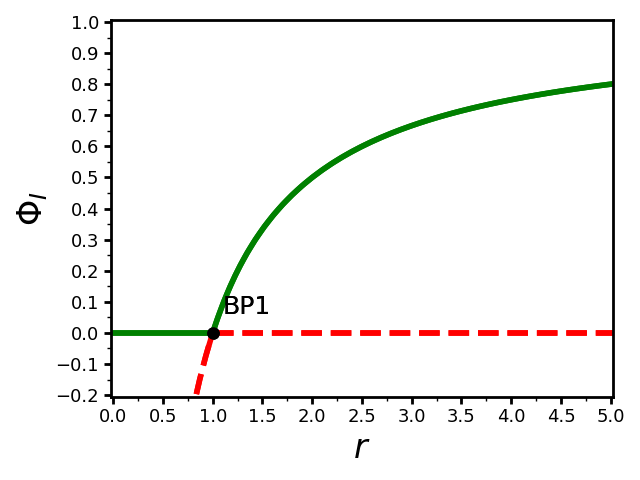

In [14]:
bif_ife =sismodel.bifurcation('r','I',silent=True,initBifParam = 0.5)
bif_ee =sismodel.bifurcation('r','I',silent=True,initBifParam = 1.5)

mc1 = mmt.MuMoTmultiController([bif_ife, bif_ee], shareAxes = True, choose_xrange=[0,5], choose_yrange=[-0.2,1])

## The SIRI model

The SIRI model has a continuum of equilibria corresponding to infection free points (IFE) (i.e., $I=0$ and $S = S^*>0$) and one unique endemic equilibrium (EE) where $I = (r_1 - 1)/r_1$ and $S = 1/r_1$. The endemic equilibrium exists if and only if $r_1 > 1$ (similar to what we saw in the SIS case with the transcritical bifurcation). 

In the previous cells, we saw how the SIRI model has as special cases the SIR and the SIS models. In the SIR case, we set $r_1=0$ to prevent reinfection, and found that all solutions reach a point in the IFE, for any value of $r_0$. In the SIS case, we set $r = r_0 = r_1$ and found a transcritical bifurcation that explains why all solutions end at a point in the IFE for $r \leq 1$, and why all solutions lead to the EE for $r>1$.  

These two particular cases (SIR, SIS) show three (Infection-Free, Epidemic, and Endemic) dynamic regimes. In the infection-free regime $I$ decay monotonically to zero. In the epidemic regime, $I$ increases at first, reaches a maximum value, and then decays to zero. In the endemic regime, solutions reach an endemic equilibrium point where $I(\infty)>0$.

The SIRI model has a fourth dynamic regime called the Bistable regime. In the bistable regime, $I$ initially decreases. For initial conditions below a critical initial condition $I_c$, solutions end at an infection-free equilibrium point (i.e., a point in the IFE), while for initial conditions above $I_c$, solutions end at the endemic equilibrium point (i.e., the EE):

### Theorem 2 in Pagliara 2018:

Depending on the values $r_0$ and $r_1$, the SIRI model has four different dynamical regimes:

Given an initial condition $I=I_0$, $S = 1-I_0$, where $0<I_0<1$, the SIRI model exhibits four different dynamical behaviors:
1. Infection-Free: If $r_0<1$ and $r_1<1$, then all solutions reach a point in the IFE as $t \to \infty$, and $I$ decays monotonically to zero.
2. Endemic: If $r_0>1$ and $r_1>1$, then all solutions reach the EE as $t \to \infty$.
3. Epidemic: If $r_0>1$ and $r_1 \leq 1$, then all solutions reach a point in the IFE as $t \to \infty$ and, at equilibrium, ${x_S^* < \frac{1-r_1}{r_0-r_1}}$. For initial conditions where $I_0  \geq \frac{b-d}{b}$, $I$ decays monotonically to zero. While for initial conditions where $I_0  < \frac{b-d}{b}$, $I$ grows initially and reaches a maximum value:

$$I^{max} = \frac{r_0-r_1}{r_1 (r_0^{r_0} (1-I_0)^{r_1})^{1/(r_0-r_1)}} + \frac{r_1-1}{r_1}$$,

before decaying to zero as $t \to \infty$.

4. Bistable: If $r_0 \leq 1$, $r_1 > 1$, then $I$ decays initially. Moreover, there is a critical initial fraction of infected individuals 
$$ I_{IC} = 1- \frac{1-r_1}{r_0-r_1} \bigg(r_0 \frac{1-r_1}{r_0-r_1}\bigg)^{-\frac{r_0}{r_1}}$$

Solutions with initial condition $I_0 < I_{IC}$ reach a point in the IFE as $t \to \infty$ and $I$ decays monotonically to zero. Solutions with initial conditions $I_0 > I_{IC}$ reach the EE as $t \to \infty$.


### SIRI Model: Bistability and Resurgent Epidemics

In the bistable regime ($r_0<1$, $r_1>1$), the fraction of infected individuals initially decreases and reaches a minimum value before increasing towards the EE. When this minimum value is very close to zero (which happens when the initial condition for $I$ is very close to the critical value $I_{IC}$), the dynamics slow down almost to a halt, and the time it takes for $I$ to increase can get arbitrariliy long. We call this phenomenon a "recurrent epidemic".

Try decreasing the initial condition for $I$ below starting at $I(0)=0.3$ to see how the time it takes for the recurrent epidemic to take place increases as $I(0)$ gets close to $I_c$. Once $I(0)<I_{IC}$, the solution no longer exhibits a recurrent epidemic. Instead, the solution reaches a point in the IFE.

FloatSlider(value=0.5, continuous_update=False, description='\\(r_{0}\\)', max=2.0, min=0.1, readout_format='.1f', style=SliderStyle(description_width='initial'))

FloatSlider(value=1.5, continuous_update=False, description='\\(r_{1}\\)', max=2.0, min=0.1, readout_format='.1f', style=SliderStyle(description_width='initial'))

Accordion(children=(Box(children=(FloatSlider(value=0.3, continuous_update=False, description='$\\Phi_{I}$ at t=0: ', disabled=True, max=1.0, step=0.01, style=SliderStyle(description_width='initial')), FloatSlider(value=0.0, continuous_update=False, description='$\\Phi_{R}$ at t=0: ', max=0.3, step=0.01, style=SliderStyle(description_width='initial')), FloatSlider(value=0.7, continuous_update=False, description='$\\Phi_{S}$ at t=0: ', max=1.0, step=0.01, style=SliderStyle(description_width='initial')), FloatSlider(value=100.0, continuous_update=False, description='Simulation time:', min=1.0, readout_format='.1f', style=SliderStyle(description_width='initial'))), layout=Layout(flex_flow='column')),), selected_index=None, _titles={'0': 'Advanced options'})

Button(icon='bookmark', style=ButtonStyle(), tooltip='Paste bookmark to log')

HTML(value='')

<IPython.core.display.Javascript object>


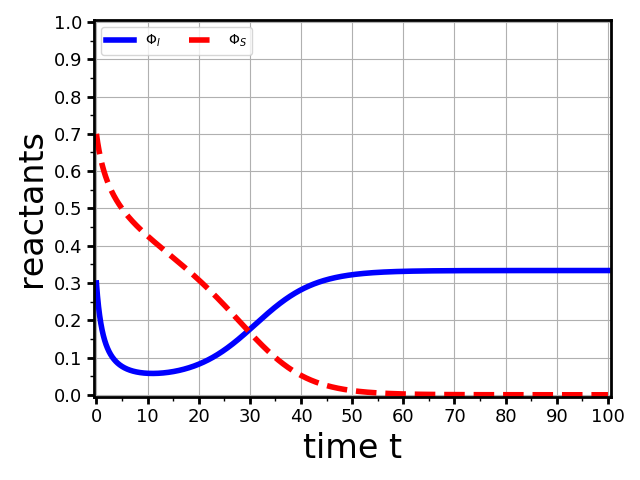

In [15]:
plot3 = model3.integrate(showStateVars=['S', 'I'],plotProportions=True, params=[('systemSize',5)],initWidgets={'maxTime':[100,1,100,0.1],'r_{0}':[0.5,0.1,2,0.1],'r_{1}':[1.5,0.1,2,0.1],'initialState': {'S': [0.7,0,1,0.01],'I': [0.3,0,1,0.01],'R': [0,0,1,0.01]}}, choose_yrange=[0, 1], conserved=True)

We can also investigate the bistability and recurrent epidemic phenomenon by examining the vector field in state-space.

Use the sliders to see how the flow changes for $r_0<1$ and $r_0>1$. Notice that all solutions eventually reach the x-axis (i.e., $I=0$), regardless of the value for $r_0$. However, notice how for $r_0>1$, solutions with a small initial value of $I$ show an epidemic where $I$ grows initially, reaches a maximum and then decays to $0$.

FloatSlider(value=0.5, continuous_update=False, description='\\(r_{0}\\)', max=2.0, min=0.1, readout_format='.1f', style=SliderStyle(description_width='initial'))

FloatSlider(value=1.5, continuous_update=False, description='\\(r_{1}\\)', max=2.0, min=0.1, readout_format='.1f', style=SliderStyle(description_width='initial'))

Button(icon='bookmark', style=ButtonStyle(), tooltip='Paste bookmark to log')

HTML(value='')

<IPython.core.display.Javascript object>


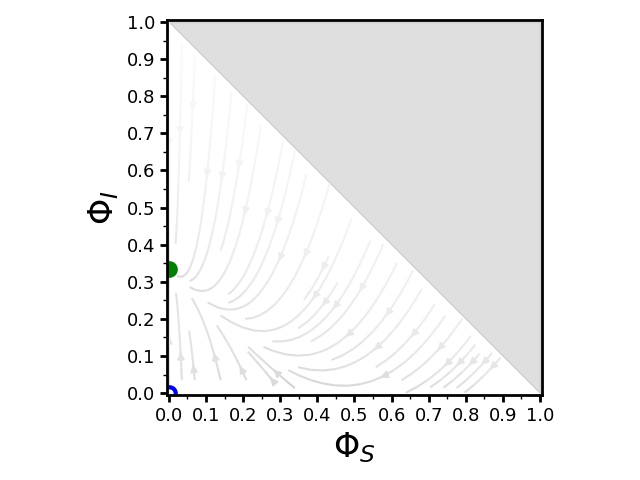

In [16]:
stream2 = model3.stream('S', 'I',showFixedPoints = True, initWidgets={'r_{0}':[0.5,0.1,2,0.1],'r_{1}':[1.5,0.1,2,0.1]})

### The effects of finite system size

The ODE models we have been looking at based on our model are very useful, but they represent an idealised scenario; they describe the behaviour of a system with infinitely many components or, to put it another way, the expected behaviour of the system, minus any noise.

Noise is very important in collective behavour systems, however, and can have a variety of causes. The first cause we will consider is noisy fluctuations from the infinite population ideal, caused by having a finite, much smaller, population. To begin analysing the noise in our system, dependent on its size, we can deploy two main techniques; stochastic simulation, and statistical physics analysis.

We will return to stochastic simulation later, concentrating first on statistical physics analysis. As you might imagine, the maths involved in a statistic physics analysis is very advanced, based on deriving and then analysing the *Master Equation*; fortunately MuMoT automates this analysis for you.

Brace yourself, this might look intimidating...

In [17]:
model1.showMasterEquation()

<IPython.core.display.Math object>

You really don't need to understand the equation above, but it's nice to know that MuMoT generated it for you, isn't it? The Master Equation describes the probabilities of different transitions between system states. We are particularly interested in it because we can use it to derive the infinite population behaviour of the system (the ODEs we already saw), but also the noise around that. This is done by applying a technique called the *van Kampen expansion* [van Kampen, 2007)](#references), to approximate the *Focker-Planck equation*. In the *Advanced users* section at the end of this manual you'll be able to look at these equations, if you dare, to convince yourself that MuMoT is doing some clever stuff for you

But what is this clever stuff useful for? Well, for one thing, it lets us see approximately what the effects of noise, caused by finite system size, are in terms of deviations from the fixed points of the system...

FloatSlider(value=2.0, continuous_update=False, description='\\(r_{0}\\)', max=20.0, readout_format='.1f', style=SliderStyle(description_width='initial'))

FloatSlider(value=2.0, continuous_update=False, description='\\(r_{1}\\)', max=20.0, readout_format='.1f', style=SliderStyle(description_width='initial'))

FloatSlider(value=10.0, continuous_update=False, description='System size', min=5.0, readout_format='.0f', step=1.0, style=SliderStyle(description_width='initial'))

Button(icon='bookmark', style=ButtonStyle(), tooltip='Paste bookmark to log')

HTML(value='')

<IPython.core.display.Javascript object>


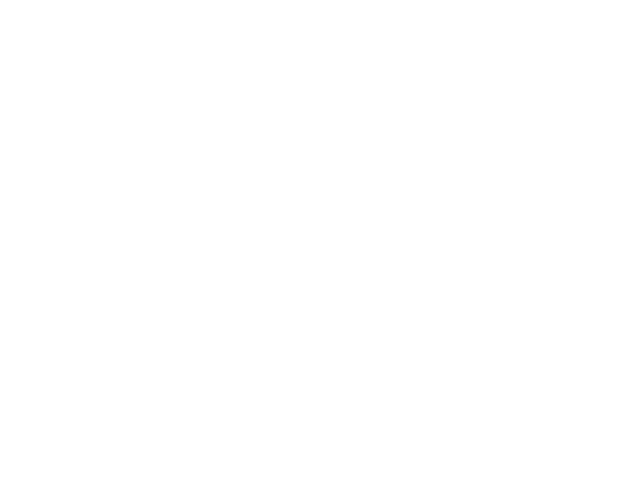

TypeError: argument is not an mpz

In [29]:
stream3 = model3.stream('S','I', showFixedPoints = False, showNoise = True)

This new `stream` plot now lets us see how the system's expected state gets 'spread out' around the fixed points. Slide the system size slider to see how the extent of the spread depends on the number of components in the system; slide the other sliders to see how the shape of the noise changes, in a way we might not have guessed, as the parameters change.

The effects of noise in the `stream` plot above are based on the computational approximations of the Master Equation. When the system has fewer than one or two reactant the noise effects can be mathematically approximated from the Master Equation. The computational approximation is achieved through the efficient and accurate *Stochastic Simulation Algorithm* (SSA) (or *Doob-Gillespie algorithm*) [(Gillespie, 1976)](#references). Alternatively, MuMot gives access to the SSA simulator to simply visualise the behaviour of the system over time.

To run the SSA simulations on your model, you can use the command `SSA()`. This command allow you to run a single simulation run, you can specify several advanced parameters from the _"Advanced options"_ tab, as described in the [Command reference](#comreference) section.
Try modifying the parameters and see how they change your results.

Also, try to see what the effects of noise are on the recurrent epidemic. Do you expect to see a recurrent epidemic at all?

FloatSlider(value=0.5, continuous_update=False, description='\\(r_{0}\\)', max=2.0, min=0.1, readout_format='.1f', style=SliderStyle(description_width='initial'))

FloatSlider(value=1.5, continuous_update=False, description='\\(r_{1}\\)', max=2.0, min=0.1, readout_format='.1f', style=SliderStyle(description_width='initial'))

FloatSlider(value=50.0, continuous_update=False, description='System size', min=5.0, readout_format='.0f', step=1.0, style=SliderStyle(description_width='initial'))

Accordion(children=(Box(children=(FloatSlider(value=0.6, continuous_update=False, description='$\\Phi_{I}$ at t=0: ', disabled=True, max=1.0, step=0.05, style=SliderStyle(description_width='initial')), FloatSlider(value=0.0, continuous_update=False, description='$\\Phi_{R}$ at t=0: ', max=0.6, step=0.05, style=SliderStyle(description_width='initial')), FloatSlider(value=0.4, continuous_update=False, description='$\\Phi_{S}$ at t=0: ', max=1.0, step=0.05, style=SliderStyle(description_width='initial')), FloatSlider(value=100.0, continuous_update=False, description='Simulation time:', min=1.0, readout_format='.1f', style=SliderStyle(description_width='initial')), IntText(value=641577198, description='Random seed:', style=DescriptionStyle(description_width='initial')), ToggleButtons(description='Plot:', options=(('Temporal evolution', 'evo'), ('Final distribution', 'final'), ('Barplot', 'barplot')), tooltips=['Population change over time', 'Population distribution in each state at final timestep', 'Barplot of states at final timestep'], value='evo'), Dropdown(description='Final distribution (x axis):', layout=Layout(display='none'), options=(('Reactant \\(I\\)', 'I'), ('Reactant \\(R\\)', 'R'), ('Reactant \\(S\\)', 'S')), style=DescriptionStyle(description_width='initial'), value='I'), Dropdown(description='Final distribution (y axis):', index=1, layout=Layout(display='none'), options=(('Reactant \\(I\\)', 'I'), ('Reactant \\(R\\)', 'R'), ('Reactant \\(S\\)', 'S')), style=DescriptionStyle(description_width='initial'), value='R'), Checkbox(value=False, description='Plot population proportions'), Checkbox(value=False, description='Runtime plot update'), IntSlider(value=1, continuous_update=False, description='Number of runs:', max=20, min=1, readout_format='.0f', style=SliderStyle(description_width='initial')), Checkbox(value=True, description='Aggregate results')), layout=Layout(flex_flow='column')),), selected_index=None, _titles={'0': 'Advanced options'})

Button(icon='bookmark', style=ButtonStyle(), tooltip='Paste bookmark to log')

HTML(value='')

FloatProgress(value=0.0, bar_style='success', description='Loading:', max=1.0, style=ProgressStyle(description_width='initial'))

<IPython.core.display.Javascript object>


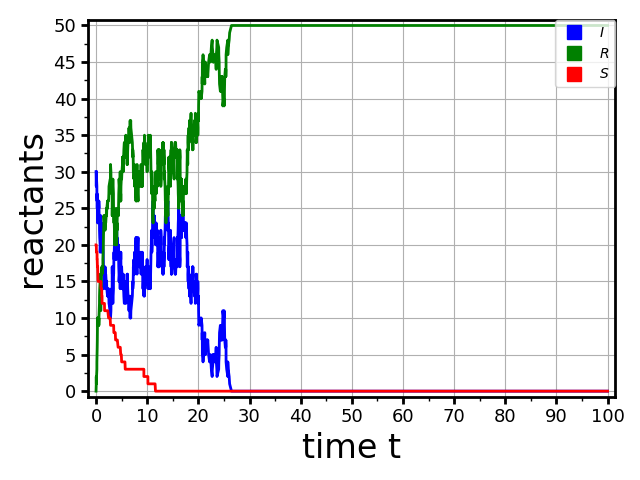

In [19]:
ssa = model3.SSA(initWidgets={'initialState': {'S': [0.4,0,1,0.05], 'I': [0.6,0,1,0.05], 'R': [0,0,1,0.05]},
                              'systemSize':[50,5,100,1], 'r_{0}':[0.5,0.1,2,0.1],'r_{1}':[1.5,0.1,2,0.1],'maxTime':[100,1,100,0.1]})

### SIRI on Network Topologies

MuMoT also enables more sophisticated stochastic simulations of your model. The `multiagent` command allows you to run simulations either with static agents interacting over a static communication network, or mobile agents communicating to neighbours within a local range of communication. Here we will focus on the network setting.

Each agent represents an individual, and exchanges messages to interact with other agents and change its internal state  (described as a *probabilistic finite state machine*). The conversion of transition rates into the probabilities is done following the methodology proposed in Reinal et al. ([2005](#references)).

Similarly to the well-mixed SIRI model, the network SIRI model also has different dynamical regimes which are distinguished by the values of $r_0$ and $r_1$. However, while in the well-mixed case the threshold value for $r_0$ and $r_1$ was 1, in the network setting the threshold value can be shown to be $1/\lambda_{max}(A)$ , where $\lambda_{max}(A)$ is the largest eigenvalue of the adjacency matrix for the network. For example, for a fully connected network $\lambda_{max}(A) = N-1$ where $N$ is the number of nodes in the graph. 

The multiagent simulations have several _Advanced options_, as described in the [Command reference](#comreference) section. Try modifying the parameters to see how they change your results. Also, make sure the simulation time is long enough so that the network reaches a steady-state.

FloatSlider(value=0.5, continuous_update=False, description='\\(r_{0}\\)', max=2.0, min=0.1, readout_format='.1f', style=SliderStyle(description_width='initial'))

FloatSlider(value=1.5, continuous_update=False, description='\\(r_{1}\\)', max=2.0, min=0.1, readout_format='.1f', style=SliderStyle(description_width='initial'))

FloatSlider(value=8.0, continuous_update=False, description='System size', min=5.0, readout_format='.0f', step=1.0, style=SliderStyle(description_width='initial'))

Accordion(children=(Box(children=(FloatSlider(value=0.1, continuous_update=False, description='$\\Phi_{I}$ at t=0: ', disabled=True, max=1.0, step=0.05, style=SliderStyle(description_width='initial')), FloatSlider(value=0.0, continuous_update=False, description='$\\Phi_{R}$ at t=0: ', max=0.1, step=0.05, style=SliderStyle(description_width='initial')), FloatSlider(value=0.9, continuous_update=False, description='$\\Phi_{S}$ at t=0: ', max=1.0, step=0.05, style=SliderStyle(description_width='initial')), FloatSlider(value=3.0, continuous_update=False, description='Simulation time:', max=10.0, readout_format='.1f', style=SliderStyle(description_width='initial')), FloatSlider(value=1.0, continuous_update=False, description='Timestep size', layout=Layout(width='50%'), max=1.0, min=0.01, step=0.01, style=SliderStyle(description_width='initial')), Dropdown(description='Network topology:', options=(('Full graph', <NetworkType.FULLY_CONNECTED: 0>), ('Erdos-Renyi', <NetworkType.ERSOS_RENYI: 1>), ('Barabasi-Albert', <NetworkType.BARABASI_ALBERT: 2>), ('Moving particles', <NetworkType.DYNAMIC: 4>)), style=DescriptionStyle(description_width='initial'), value=<NetworkType.FULLY_CONNECTED: 0>), FloatSlider(value=0.0, continuous_update=False, description='Network connectivity parameter', layout=Layout(width='50%'), max=0.0, readout_format='.0f', step=0.0, style=SliderStyle(description_width='initial')), FloatSlider(value=0.01, continuous_update=False, description='Particle speed', layout=Layout(width='50%'), max=0.1, readout_format='.3f', step=0.005, style=SliderStyle(description_width='initial')), FloatSlider(value=0.5, continuous_update=False, description='Correlatedness of the random walk', layout=Layout(width='50%'), max=1.0, step=0.05, style=SliderStyle(description_width='initial')), IntText(value=36856028, description='Random seed:', style=DescriptionStyle(description_width='initial')), ToggleButtons(description='Plot:', index=1, options=(('Temporal evolution', 'evo'), ('Network', 'graph'), ('Final distribution', 'final'), ('Barplot', 'barplot')), tooltips=['Population change over time', 'Population distribution in each state at final timestep', 'Barplot of states at final timestep'], value='graph'), Dropdown(description='Final distribution (x axis):', layout=Layout(display='none'), options=(('Reactant \\(I\\)', 'I'), ('Reactant \\(R\\)', 'R'), ('Reactant \\(S\\)', 'S')), style=DescriptionStyle(description_width='initial'), value='I'), Dropdown(description='Final distribution (y axis):', index=1, layout=Layout(display='none'), options=(('Reactant \\(I\\)', 'I'), ('Reactant \\(R\\)', 'R'), ('Reactant \\(S\\)', 'S')), style=DescriptionStyle(description_width='initial'), value='R'), Checkbox(value=True, description='Show particle trace'), Checkbox(value=True, description='Show communication links'), Checkbox(value=False, description='Plot population proportions'), Checkbox(value=False, description='Runtime plot update'), IntSlider(value=1, continuous_update=False, description='Number of runs:', max=20, min=1, readout_format='.0f', style=SliderStyle(description_width='initial')), Checkbox(value=True, description='Aggregate results')), layout=Layout(flex_flow='column')),), selected_index=None, _titles={'0': 'Advanced options'})

Button(icon='bookmark', style=ButtonStyle(), tooltip='Paste bookmark to log')

HTML(value='')

FloatProgress(value=0.0, bar_style='success', description='Loading:', max=1.0, style=ProgressStyle(description_width='initial'))

<IPython.core.display.Javascript object>


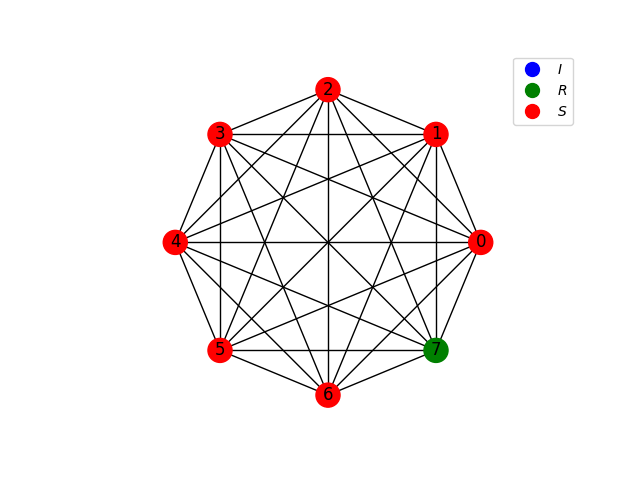

In [28]:
ssa = model3.multiagent(initWidgets={'initialState': {'S': [0.9,0,1,0.05], 'I': [0.1,0,1,0.05], 'R': [0,0,1,0.05]},
                              'systemSize':[8,5,100,1],'r_{0}':[0.5,0.1,2,0.1],'r_{1}':[1.5,0.1,2,0.1], 'visualisationType':'graph','runTimeUpdate':True, 'showTrace':True, 'showInteractions':True})

### References
<a id='references'></a>
* Gillespie, D. T. (1976). A general method for numerically simulating the stochastic time evolution of coupled chemical reactions. *Journal of Computational Physics* **22** (4): 403–434
* Hayot, F. & C. Jayaprakash (2004) 
[The linear noise approximation for molecular fluctuations within cells](http://iopscience.iop.org/article/10.1088/1478-3967/1/4/002/pdf). *Physical Biology* **1**, 205-210
* Murray, J. D. (2002) *Mathematical Biology I. An Introduction (Second Edition)*. Springer
* Pais, D., Hogan, P.M., Schlegel, T., Franks, N.R., Leonard, N.E. & Marshall, J.A.R. (2013) [A mechanism for value-sensitive decision-making](http://journals.plos.org/plosone/article?id=10.1371/journal.pone.0073216).  *PLoS one* **8**(9), e73216
* Pagliara, R., Dey, B. & Leonard, N.E. (2018) [Bistability and Resurgent Epidemics in Reinfection Models](http://ieeexplore.ieee.org/stamp/stamp.jsp?tp=&arnumber=8353159&isnumber=8226891). *IEEE Control Systems Letters* **2**(2) 290-295.
* Reina A., Valentini G., Fernández-Oto A., Dorigo M. & Trianni V. (2015) [A design pattern for decentralised decision making](http://journals.plos.org/plosone/article?id=10.1371/journal.pone.0140950).  *PLoS one* **10**(10), e0140950
* Seeley, T.D, Visscher, P.K. Schlegel, T., Hogan, P.M., Franks, N.R. & Marshall, J.A.R. (2012) [Stop signals provide cross inhibition in collective decision-making by honeybee swarms](http://www.sciencemag.org/content/335/6064/108.full.pdf). *Science* **335**, 108-111
* van Kampen, N. (2007) *Stochastic Processes in Physics and Chemistry (Third Edition)*. North-Holland